<a href="https://colab.research.google.com/github/tort-cam/ST-554-P1/blob/main/Task2/ST554Proj1EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Project 1 Task 2: Exploratory Data Analysis
Author : Cameron Mullaney

In this notebook, we will perform an **EDA** (exploratory data analysis) on the **Air Quality dataset** provided by UCI.

This process features a few key steps:
- Loading in the data
- Basic data validation
- Investigate missing values
- Clean up data (Handle missing values)
- Investigate distributions (the fun part!)
    - This is where we will create some preliminary figures, and try to get a general idea of the patterns that may exist in this data
    - Our exploration revolves around the **Benzene levels** specifically, which dramatically reduces the number of relationships we have to explore.
    - This section will heavily feature plots, as well as single and multiple linear regression models.


This process will provide us direction for future work with this dataset, better informing the variables we would choose to investigate further.


##Loading in the data from UCI and installing modules I'll need.

Because I am using a variety of methods to evaluate the data, I am using *quite a few* different modules.

In [ ]:
!pip install ucimlrepo ## This module allows us to pull in the UCI data

In [ ]:
## These will allow us to handle, visualize and analyze our data.
Import numpy as np
import pandas as pd
import math
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from sklearn import linear_model
import sklearn.metrics as metrics
import plotly.express as px
from sklearn.model_selection import train_test_split

In [ ]:
air_quality = fetch_ucirepo(id=360) #Pull in UCI data
aq = pd.DataFrame(air_quality.data.features)
#This air_quality object contains 2 separate datasets,
#and we only need one of the, the "features" subset.

##Understanding how this data is stored
This data is almost entirely numeric, with the exception of `Date` and `Time`, and I will convert those to a usable value later. All other columns are either integers or floats.

In [ ]:
aq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   int64  
 4   NMHC(GT)       9357 non-null   int64  
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   int64  
 7   NOx(GT)        9357 non-null   int64  
 8   PT08.S3(NOx)   9357 non-null   int64  
 9   NO2(GT)        9357 non-null   int64  
 10  PT08.S4(NO2)   9357 non-null   int64  
 11  PT08.S5(O3)    9357 non-null   int64  
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(5), int64(8), object(2)
memory usage: 1.1+ MB


We were told we can ignore the "True" pollutant measurements, other than Benzene, so I'm removing columns with a "(GT)" in them, other than C6H6 (Benzene)

In [ ]:
aq_sub = aq.iloc[:,[0,1,3,5,6,8,10,11,12,13,14]]

taking a look at aq_sub, it seems good! Removed what we don't need.

In [ ]:
aq_sub

,Date,Time,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,1360,11.9,1046,1056,1692,1268,13.6,48.9,0.7578
1,3/10/2004,19:00:00,1292,9.4,955,1174,1559,972,13.3,47.7,0.7255
2,3/10/2004,20:00:00,1402,9.0,939,1140,1555,1074,11.9,54.0,0.7502
3,3/10/2004,21:00:00,1376,9.2,948,1092,1584,1203,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1272,6.5,836,1205,1490,1110,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...
9352,4/4/2005,10:00:00,1314,13.5,1101,539,1374,1729,21.9,29.3,0.7568
9353,4/4/2005,11:00:00,1163,11.4,1027,604,1264,1269,24.3,23.7,0.7119
9354,4/4/2005,12:00:00,1142,12.4,1063,603,1241,1092,26.9,18.3,0.6406
9355,4/4/2005,13:00:00,1003,9.5,961,702,1041,770,28.3,13.5,0.5139


##Basic Data Validation

Taking a quick peek at what we're working with, using the `.describe()` method.
Looks like there are a lot of -200 values, which represent "missing values"

In [ ]:
aq_sub.describe()

,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,1048.990061,1.865683,894.595276,794.990168,1391.479641,975.072032,9.778305,39.485380,-6.837604
std,329.832710,41.380206,342.333252,321.993552,467.210125,456.938184,43.203623,51.216145,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,921.000000,4.000000,711.000000,637.000000,1185.000000,700.000000,10.900000,34.100000,0.692300
50%,1053.000000,7.900000,895.000000,794.000000,1446.000000,942.000000,17.200000,48.600000,0.976800
75%,1221.000000,13.600000,1105.000000,960.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,2040.000000,63.700000,2214.000000,2683.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


##Determine Rate of Missing Values

Let's see how many missing values there are: Looks like we've got ~3300, but only in 366 rows. This suggests that these missing values are often stacked in single rows. Here, `na_ct` will count missing values, while `row_ct` will count the number of rows containing missing values.

In [ ]:
na_ct = 0
row_ct = 0
test = False
for row in aq_sub.iloc[:,2:].values:
  test = False
  for val in row:
    if math.isclose(val, -200):
      na_ct+=1
      test = True
  if test:
    row_ct+=1
print (str(na_ct))
print (row_ct)

3294
366


##Clean up data

Okay! Let's replace these -200 values with `NaN` values, and then we can use `.dropna()` to remove them. Our df has gotten 366 rows shorter, the number we were expecting from the last cell's `row_ct` value. I've decided on `aqf` as our dataFrame name, for "Air Quality Fixed". We've also renamed our columns for clarity. Now, another look at `.describe()` shows us meaningful summaries of our data: We know each variables mean, median, st.dev and much more!

In [ ]:
aqtemp = aq_sub.replace(float(-200), np.nan)
aqf = aqtemp.dropna()
print(len(aq_sub)-len(aqf))
aqf = aqf.rename(columns={'C6H6(GT)': 'B', 'PT08.S1(CO)': 'CO', \
                          'PT08.S2(NMHC)': 'NMHC', 'PT08.S3(NOx)': 'NOx', \
                          'PT08.S4(NO2)': 'NO2', 'PT08.S5(O3)': 'O3'})
aqf.describe()

366


,CO,B,NMHC,NOx,NO2,O3,T,RH,AH
count,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000
mean,1099.833166,10.083105,939.153376,835.493605,1456.264598,1022.906128,18.317829,49.234201,1.025530
std,217.080037,7.449820,266.831429,256.817320,346.206794,398.484288,8.832116,17.316892,0.403813
min,647.000000,0.100000,383.000000,322.000000,551.000000,221.000000,-1.900000,9.200000,0.184700
25%,937.000000,4.400000,734.500000,658.000000,1227.000000,731.500000,11.800000,35.800000,0.736800
50%,1063.000000,8.200000,909.000000,806.000000,1463.000000,963.000000,17.800000,49.600000,0.995400
75%,1231.000000,14.000000,1116.000000,969.500000,1674.000000,1273.500000,24.400000,62.500000,1.313700
max,2040.000000,63.700000,2214.000000,2683.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


Here I am reformatting date and time into a single column for simplicity, and using `datetime` to treat them as a datetime object.

In [ ]:
aqf["DTtemp"] = aqf['Date'] + " " + aqf["Time"]
aqf["datetime"] = pd.to_datetime((aqf['DTtemp']), format = 'mixed', dayfirst = False)
aqf = aqf.drop("DTtemp", axis = 1)

##Investigate Distributions

###Benzene Histogram
Now that we've cleaned up these missing values, let's get to work! Looks like Benzene (B) is pretty right skewed, with most values being <20.


(array([3.497e+03, 2.899e+03, 1.510e+03, 7.000e+02, 2.540e+02, 9.200e+01,
        2.200e+01, 1.500e+01, 1.000e+00, 1.000e+00]),
 array([ 0.1 ,  6.46, 12.82, 19.18, 25.54, 31.9 , 38.26, 44.62, 50.98,
        57.34, 63.7 ]),
 <BarContainer object of 10 artists>)

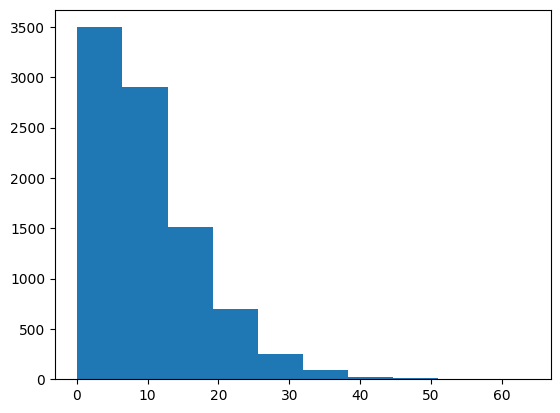

In [ ]:
plt.hist(aqf["B"])

###Benzene by Datetime
Looks like the `datetime` column is working as intended! Noticing a drop in Benzene values around August 2004

Text(0.5, 1.0, 'Benzene levels over time')

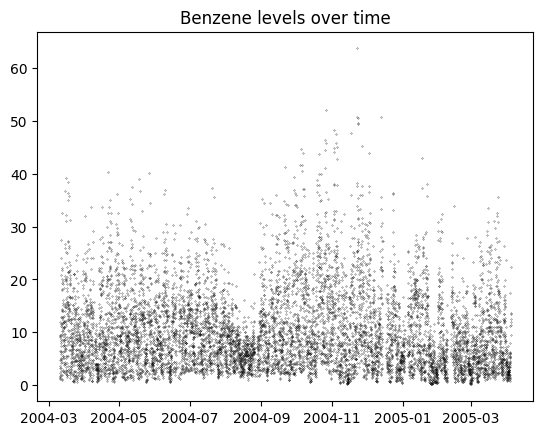

In [ ]:
plt.scatter(aqf["datetime"], aqf["B"], s = .05, c = "black")
plt.title("Benzene levels over time")

###Benzene by Everything (W/ SLR)
Here we've got scatter plots of Benzene levels with every other numeric variable, just to get an idea of what our data looks like. Immediately, it seems like Benzene is correlated strongly with CO, NOx, NO2, and O3. NMHC looks a little *too* nice, where it seems like they might be measuring the same thing, just on different scales. I'll need some software math to figure out if temp, relative humidity, or absolute humidity are correlated with Benzene.

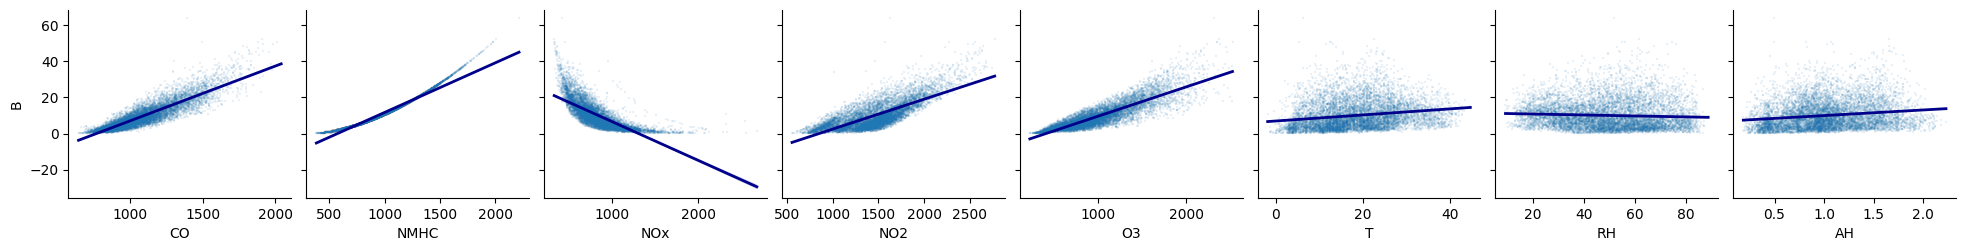

In [ ]:
notB = aqf.columns.drop(["B", "Date", "Time", "datetime"])
every = sns.pairplot(kind = "reg", data = aqf, y_vars = "B", x_vars = notB, markers = "+",plot_kws = {'line_kws':{'lw' : 2, 'color':"darkblue"}, 'scatter_kws':{'alpha':.1, 's':2}})

###Datetime by Everything
Here, I've set the Y axis to `datetime`, showing changes in these variables over the 1 year range. Seems like a lot of the pollution variables drop in August 2004.

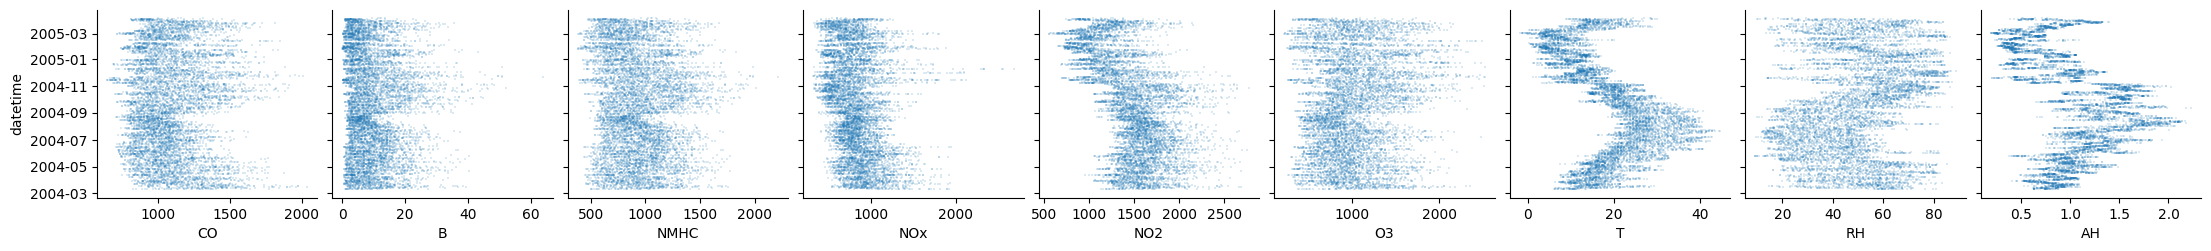

In [ ]:
notDT = aqf.columns.drop(["Date", "Time", "datetime"])
every = sns.pairplot(kind = "scatter", data = aqf, y_vars = "datetime", x_vars = notDT, markers = "+", plot_kws = {'s' : 2})

###Simple (Single) Linear Models
Let's look at some linear model values!
Here we see that NMHC and Benzene are very strongly correlated (Rsquared of .965), which makes sense given their *too* nice graph earlier.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(aqf['NMHC'], aqf['B'], test_size=0.2, random_state=42)
co = linear_model.LinearRegression()
co.fit(X_train.values.reshape(-1,1), y_train.values)
COpred = co.predict(X_train.values.reshape(-1,1))
print("Linear Model for NMHC and Benzene", "\nIntercept \t:", co.intercept_, "\nCoefficient\t:", co.coef_, \
      "\nRMSE\t\t:", np.sqrt(metrics.mean_squared_error(y_train.values, COpred)), "\nRsquared\t:", \
      co.score(X_test.values.reshape(-1,1), y_test))

Linear Model for NMHC and Benzene 
Intercept 	: -15.584768290053542 
Coefficient	: [0.02733408] 
RMSE		: 1.4077346830141237 
Rsquared	: 0.9651672288494462


Here I've put together a function we can use to find some simple linear regression values. Just need to provide the column names of the 2 variables.

In [ ]:
def lmtest(v1, v2, graph = False):
  """
  This function takes in two column names from this data
  (NOT ANY DATA SHEET JUST THIS ONE)
  and returns some important regression values, as well as a color-coded figure
  if you supply True for graph
  """
  X_train, X_test, y_train, y_test = train_test_split(aqf[v1], aqf[v2], test_size=0.2, random_state=42)

  lm = linear_model.LinearRegression()
  lm.fit(X_train.values.reshape(-1,1), y_train.values)
  if graph:
    sns.regplot(x = X_train, y = y_train, marker = "+", scatter_kws = {'s' : 1}, \
              line_kws ={'color': "darkblue"}, label = "Train")
    sns.scatterplot(x = X_test, y = y_test, marker = "o", s = 1, color = "red", label = "Test")
    plt.legend()
  pred = lm.predict(X_train.values.reshape(-1,1))
  print("Linear Model for " + v1 + " and " + v2, "\nIntercept \t:", lm.intercept_, "\nCoefficient\t:", \
        lm.coef_, "\nRMSE\t\t:", np.sqrt(metrics.mean_squared_error(y_train.values, pred)), "\nRsquared\t:", \
        lm.score(X_test.values.reshape(-1,1), y_test))

Here, I am using this `lmtest` function to look at the relationship between NO2 and Benzene

In [ ]:
lmtest("NO2", "B")

Linear Model for NO2 and B 
Intercept 	: -13.957832681811297 
Coefficient	: [0.0164713] 
RMSE		: 4.774629893607938 
Rsquared	: 0.5892545423485874


###Creating Categoricals
Creating ordered categories for Temp using `.describe()` quartiles from earlier, separating out the top and bottom 25% of values as "low" and "high"

######Temperature

In [ ]:
aqf['Tcat'] = "M"
aqf.loc[aqf['T']> 24.4, 'Tcat'] = "H"
aqf.loc[aqf['T']< 11.8, 'Tcat'] = "L"
aqf['Tcat'] = aqf.Tcat.astype("category")
order = ["L", "M", "H"]
cat_dtype = pd.CategoricalDtype(categories=order, ordered=True)
aqf['Tcat'] = aqf['Tcat'].astype(cat_dtype)

Here, we see that in general, as temp increases (From low -> medium -> high), mean Benzene level also increases.

This is reflected in the numeric summary as well.

,B
Tcat,
L,7.837215
M,10.402320
H,11.682706


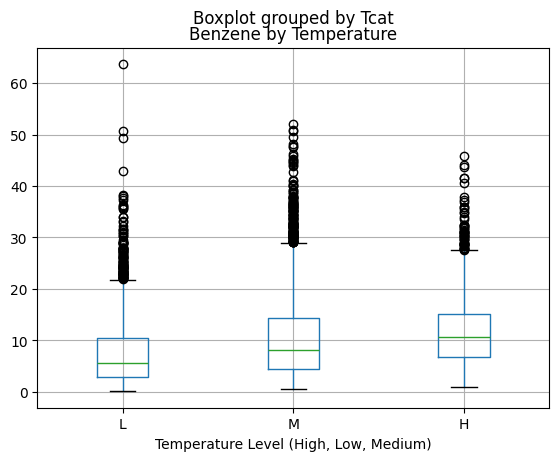

In [ ]:
aqf.boxplot(column = ['B'], by = "Tcat")
plt.title("Benzene by Temperature")
plt.xlabel("Temperature Level (High, Low, Medium)")
aqf.groupby("Tcat", observed = False)["B"].mean()

##### Relative Humidity

In [ ]:
aqf['RHcat'] = "M"
aqf.loc[aqf['RH']> 62.5, 'RHcat'] = "H"
aqf.loc[aqf['RH']< 35.8, 'RHcat'] = "L"
aqf['RHcat'] = aqf.RHcat.astype("category")
aqf['RHcat'] = aqf['RHcat'].astype(cat_dtype)

We don't see nearly as much change as Relative Humidity increases, though there is still a slight change.

,B
RHcat,
L,10.803084
M,10.056390
H,9.417642


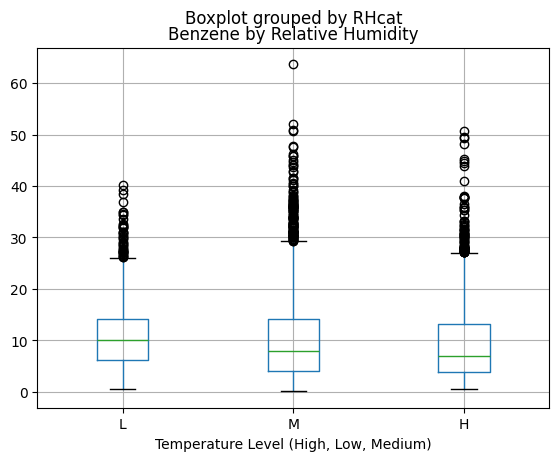

In [ ]:
aqf.boxplot(column = ['B'], by = "RHcat")
plt.title("Benzene by Relative Humidity")
plt.xlabel("Temperature Level (High, Low, Medium)")
aqf.groupby("RHcat", observed = False)["B"].mean()

#####Months and Seasons

In [ ]:
aqf['Month'] = pd.DatetimeIndex(aqf['datetime']).month
cat_dtype2 = pd.CategoricalDtype(ordered=True)
aqf['Month'] = aqf['Month'].astype(cat_dtype2)


In [ ]:
aqf["Season"] = "Fall"
aqf.loc[aqf['Month']< 10,'Season'] = "Summer"
aqf.loc[aqf['Month']< 7, 'Season'] = "Spring"
aqf.loc[aqf['Month']< 4, 'Season'] = "Winter"
aqf['Season'] = aqf.Season.astype("category")
order2 = ["Winter", "Spring", "Summer", "Fall"]
cat_dtype = pd.CategoricalDtype(categories=order2, ordered=True)
aqf['Season'] = aqf['Season'].astype(cat_dtype)

We do see some seasonal and monthly variation in Benzene!

<Axes: title={'center': 'B'}, xlabel='Season'>

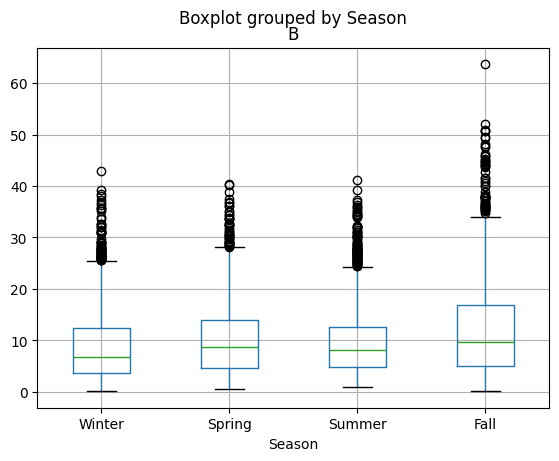

In [ ]:
aqf.boxplot(column = ['B'], by = "Season")

<Axes: title={'center': 'B'}, xlabel='Month'>

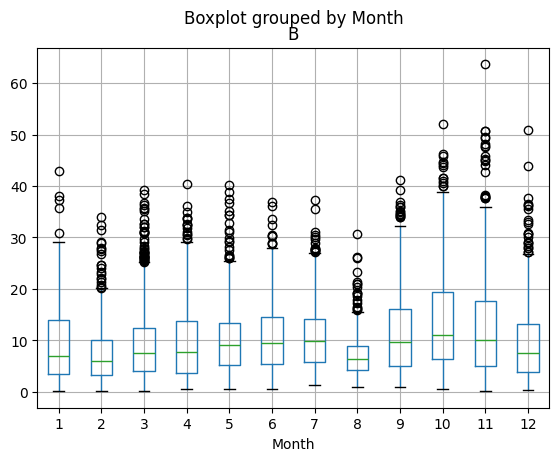

In [ ]:
aqf.boxplot(column = ['B'], by = "Month")

<Axes: xlabel='Month', ylabel='B'>

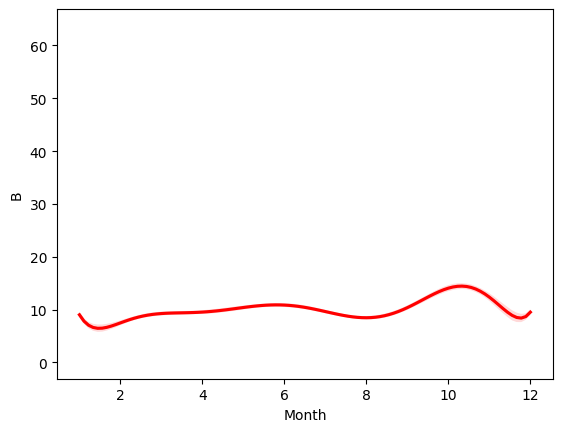

In [ ]:
sns.regplot(x = aqf['Month'], y = aqf['B'], order = 8, marker = "none", color = "red")


### Correlations

Here I've printed the Spearman's correlation values for Benzene with each other numeric variable (no dates or times). What we see here reflects the figures early on, where the other pollutants are much more clearly correlated with Benzene than temperature or humidity.

In [ ]:
notB = aqf.columns.drop(["B", "Date", "Time", "datetime", "Tcat", "Month", "Season"])
print("Spearman's Corr Values \n")
for x in notB:
  print(x, "\n", aqf.loc[:, ["B", x]].corr(method = 'spearman'), "\n")


Spearman's Corr Values 

CO 
           B       CO
B   1.00000  0.88948
CO  0.88948  1.00000 

NMHC 
              B      NMHC
B     1.000000  0.999984
NMHC  0.999984  1.000000 

NOx 
            B      NOx
B    1.00000 -0.85036
NOx -0.85036  1.00000 

NO2 
             B       NO2
B    1.000000  0.748551
NO2  0.748551  1.000000 

O3 
            B        O3
B   1.000000  0.873823
O3  0.873823  1.000000 

T 
          B        T
B  1.00000  0.27565
T  0.27565  1.00000 

RH 
            B        RH
B   1.000000 -0.122272
RH -0.122272  1.000000 

AH 
            B        AH
B   1.000000  0.191749
AH  0.191749  1.000000 

Month 
               B     Month
B      1.000000  0.119883
Month  0.119883  1.000000 



###MLR
Here, I have put together a MLR of NOx, NO2, with Benzene. We get a RMSE of 3.84

In [ ]:
X1_train, X1_test, X2_train, X2_test, y_train, y_test = train_test_split(aqf['NOx'], aqf['NO2'], aqf['B'], test_size=0.2, random_state=42)

mlr = linear_model.LinearRegression()
x_train = pd.concat([X1_train, X2_train], axis = 1)
x_test = pd.concat([X1_test, X2_test], axis = 1)
mlr.fit(x_train, y_train)
pred = mlr.predict(x_train)

print("Benzene by",X1_train.name, "and", X2_train.name, "\nIntercept \t\t:", mlr.intercept_, "\nCoefficient [NOx, NO2]\t:", mlr.coef_, \
      "\nRMSE\t\t\t:", np.sqrt(metrics.mean_squared_error(y_train.values, pred)), "\nRsquared\t\t:", \
      mlr.score(x_test, y_test))

Benzene by NOx and NO2 
Intercept 		: 4.597931721039066 
Coefficient [NOx, NO2]	: [-0.0130144   0.01121717] 
RMSE			: 3.8413341173121203 
Rsquared		: 0.7408457370244153


This is a 3D *interactive* figure of NOx, NO2, and Benzene, the same variables used in the MLR test above. These variables seem pretty related.

In [ ]:
fig = plt.figure()
fig = px.scatter_3d(aqf, x = 'NOx', y = 'NO2', z = 'B')
fig.update_traces(marker=dict(size=1))

<Figure size 640x480 with 0 Axes>

Here, using Temp and Relative Humidity to predict B, we get a much larger RMSE of 7.25, suggesting that this model is not as helpful.

In [ ]:
X1_train, X1_test, X2_train, X2_test, y_train, y_test = train_test_split(aqf['T'], aqf['RH'], aqf['B'], test_size=0.2, random_state=42)

mlr = linear_model.LinearRegression()
x_train = pd.concat([X1_train, X2_train], axis = 1)
x_test = pd.concat([X1_test, X2_test], axis = 1)
mlr.fit(x_train, y_train)
pred = mlr.predict(x_train)

print("Benzene by",X1_train.name, "and", X2_train.name, "\nIntercept \t\t:", mlr.intercept_, "\nCoefficient [NOx, NO2]\t:", mlr.coef_, \
      "\nRMSE\t\t\t:", np.sqrt(metrics.mean_squared_error(y_train.values, pred)), "\nRsquared\t\t:", \
      mlr.score(x_test, y_test))

Benzene by T and RH 
Intercept 		: 4.354820946987532 
Coefficient [NOx, NO2]	: [0.20550488 0.03797304] 
RMSE			: 7.2540731406206 
Rsquared		: 0.04504165084733869
